# Current and voltage analysis of esc

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from firefly_preprocessing import get_dfs
from scipy.fft import fft, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy import signal
import time

ModuleNotFoundError: No module named 'matplotlib'

In [214]:
data_directory = ['../flight_data/2021-12-10_hangar', '../flight_data/2022-01-24_hangar',
                  '../flight_data/2022-01-24_hangar']

ulg_number = [109, 143, 145]
firefly_number = [54, 5, 9]

In [215]:
firefly_df, arm_df, ulg_df = get_dfs(data_directory[2],
                                         ulg_number[2], firefly_number[2])

[find_file_in_folder] fpath /home/gregor/Masterarbeit/flight_data/2022-01-24_hangar/logs
[find_file_in_folder] extension .firefly
[find_file_in_folder] log_num 9
[find_file_in_folder] selected_file /home/gregor/Masterarbeit/flight_data/2022-01-24_hangar/logs/log_9_2022-01-24-00-37-58.firefly
[find_file_in_folder] fpath /home/gregor/Masterarbeit/flight_data/2022-01-24_hangar/logs
[find_file_in_folder] extension .ulg
[find_file_in_folder] log_num 145
[find_file_in_folder] selected_file /home/gregor/Masterarbeit/flight_data/2022-01-24_hangar/logs/log_145_2022-1-24-13-00-42.ulg
firefly file: /home/gregor/Masterarbeit/flight_data/2022-01-24_hangar/logs/log_9_2022-01-24-00-37-58.firefly
ulg file: /home/gregor/Masterarbeit/flight_data/2022-01-24_hangar/logs/log_145_2022-1-24-13-00-42.ulg
Inside synchronize_ulg_dict
Before
Mean sampling time of ulg_pv_df is 0.09997599390889816 s
Mean sampling time of ulg_accel_df is 0.049993983181035616 s
Mean sampling time of ulg_att_df is 0.04999398066481271

In [216]:
time_index = firefly_df.index.values.reshape(-1, 1)
voltage = firefly_df['esc11_voltage'].values


## Voltage analysis

Analyzing voltage and trying to fit a polynomial curve through the signal

In [5]:
plt.interactive(False)
fig1, ax1 = plt.subplots()
#ax1.set_xlim(0, max(time_index))
#ax1.set_ylim(0, max(time_index))
ax1.set_xlabel('time [s]')
ax1.set_ylabel('voltage [V]')
ax1.grid()

In [6]:
poly = PolynomialFeatures(degree=4)
poly_features = poly.fit_transform(time_index)
poly_reg_model = linear_model.LinearRegression()

In [7]:
poly_reg_model.fit(poly_features, voltage)
fit_curve = poly_reg_model.predict(poly_features)

In [8]:
ax1.clear()

<IPython.core.display.Javascript object>


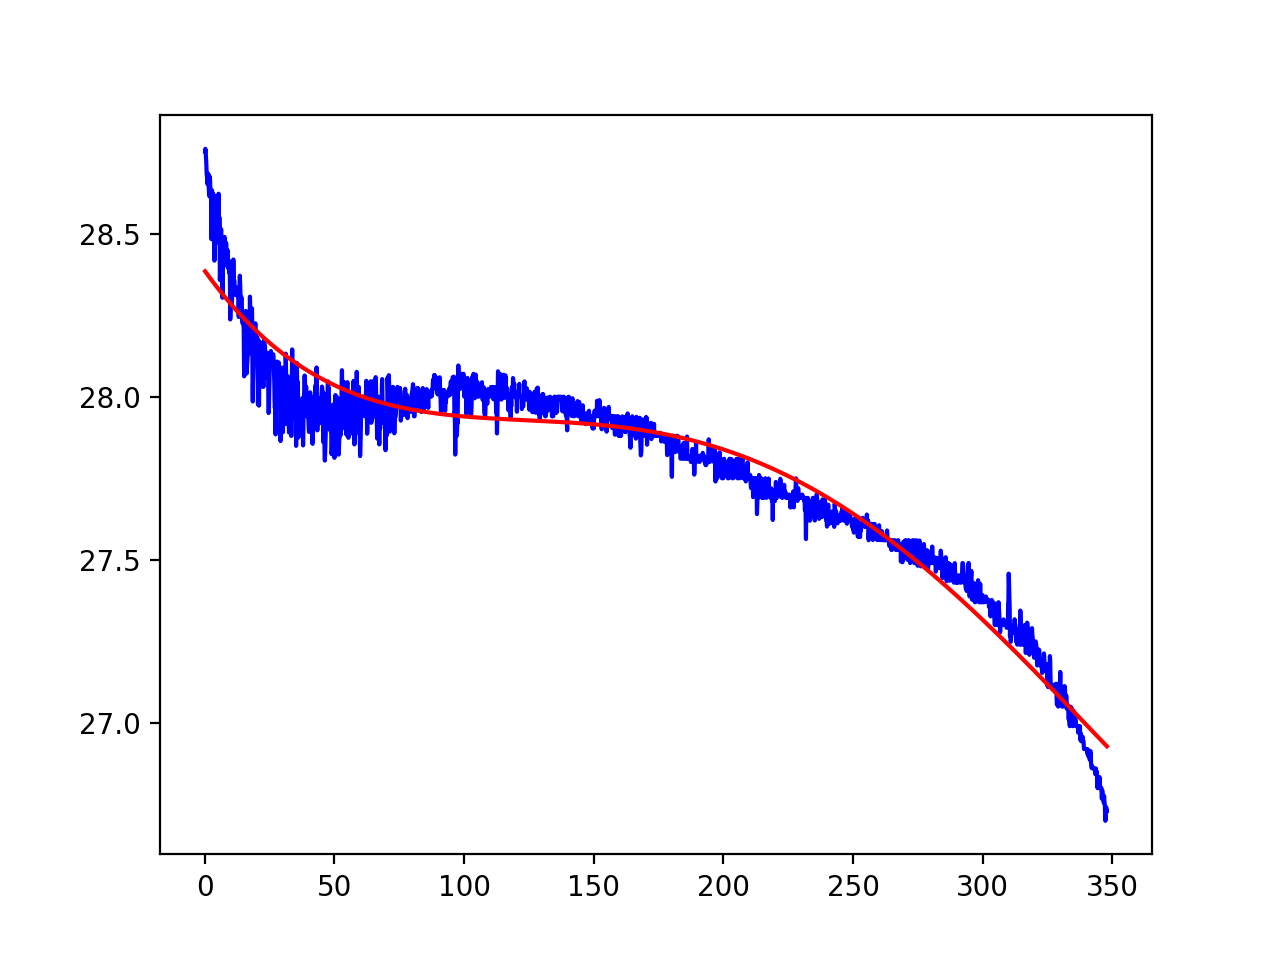

In [9]:
ax1.plot(time_index, voltage, 'b')
ax1.plot(time_index, fit_curve, 'r')
display(fig1)

## Current analysis

In [10]:
def normalization(data_vector, method='minmax'):
    
    if method == 'minmax':
        minimum = np.min(data_vector)
        maximum = np.max(data_vector)
    
        return (data_vector - minimum) / (maximum - minimum)
    
    if method == 'zscore':
        return (data_vector - np.mean(data_vector)) / np.std(data_vector)

In [11]:
# Get current, RPM and throttle for motor 1
current_11 = firefly_df['esc11_current'].values
rpm_11 = firefly_df['esc11_rpm'].values
in_throttle_11 = firefly_df['esc11_inthrottle'].values
out_throttle_11 = firefly_df['esc11_outthrottle'].values

In [12]:
# Get current, RPM and throttle for motor 1
current_16 = firefly_df['esc16_current'].values
rpm_16 = firefly_df['esc16_rpm'].values
in_throttle_16 = firefly_df['esc16_inthrottle'].values
out_throttle_16 = firefly_df['esc16_outthrottle'].values

In [13]:
# Normalizing signal

#current_11_norm = normalization(current_11)
#rpm_11_norm = normalization(rpm_11)

current_11_norm = normalization(current_11, 'zscore')
rpm_11_norm = normalization(rpm_11, 'zscore')
in_throttle_11_norm = normalization(in_throttle_11, 'zscore')
out_throttle_11_norm = normalization(out_throttle_11, 'zscore')

current_16_norm = normalization(current_16, 'zscore')
rpm_16_norm = normalization(rpm_16, 'zscore')
in_throttle_16_norm = normalization(in_throttle_16, 'zscore')
out_throttle_16_norm = normalization(out_throttle_16, 'zscore')

#diff_mima = rpm_norm - current_norm
#diff_z = rpm_norm_z - current_norm_z

<IPython.core.display.Javascript object>


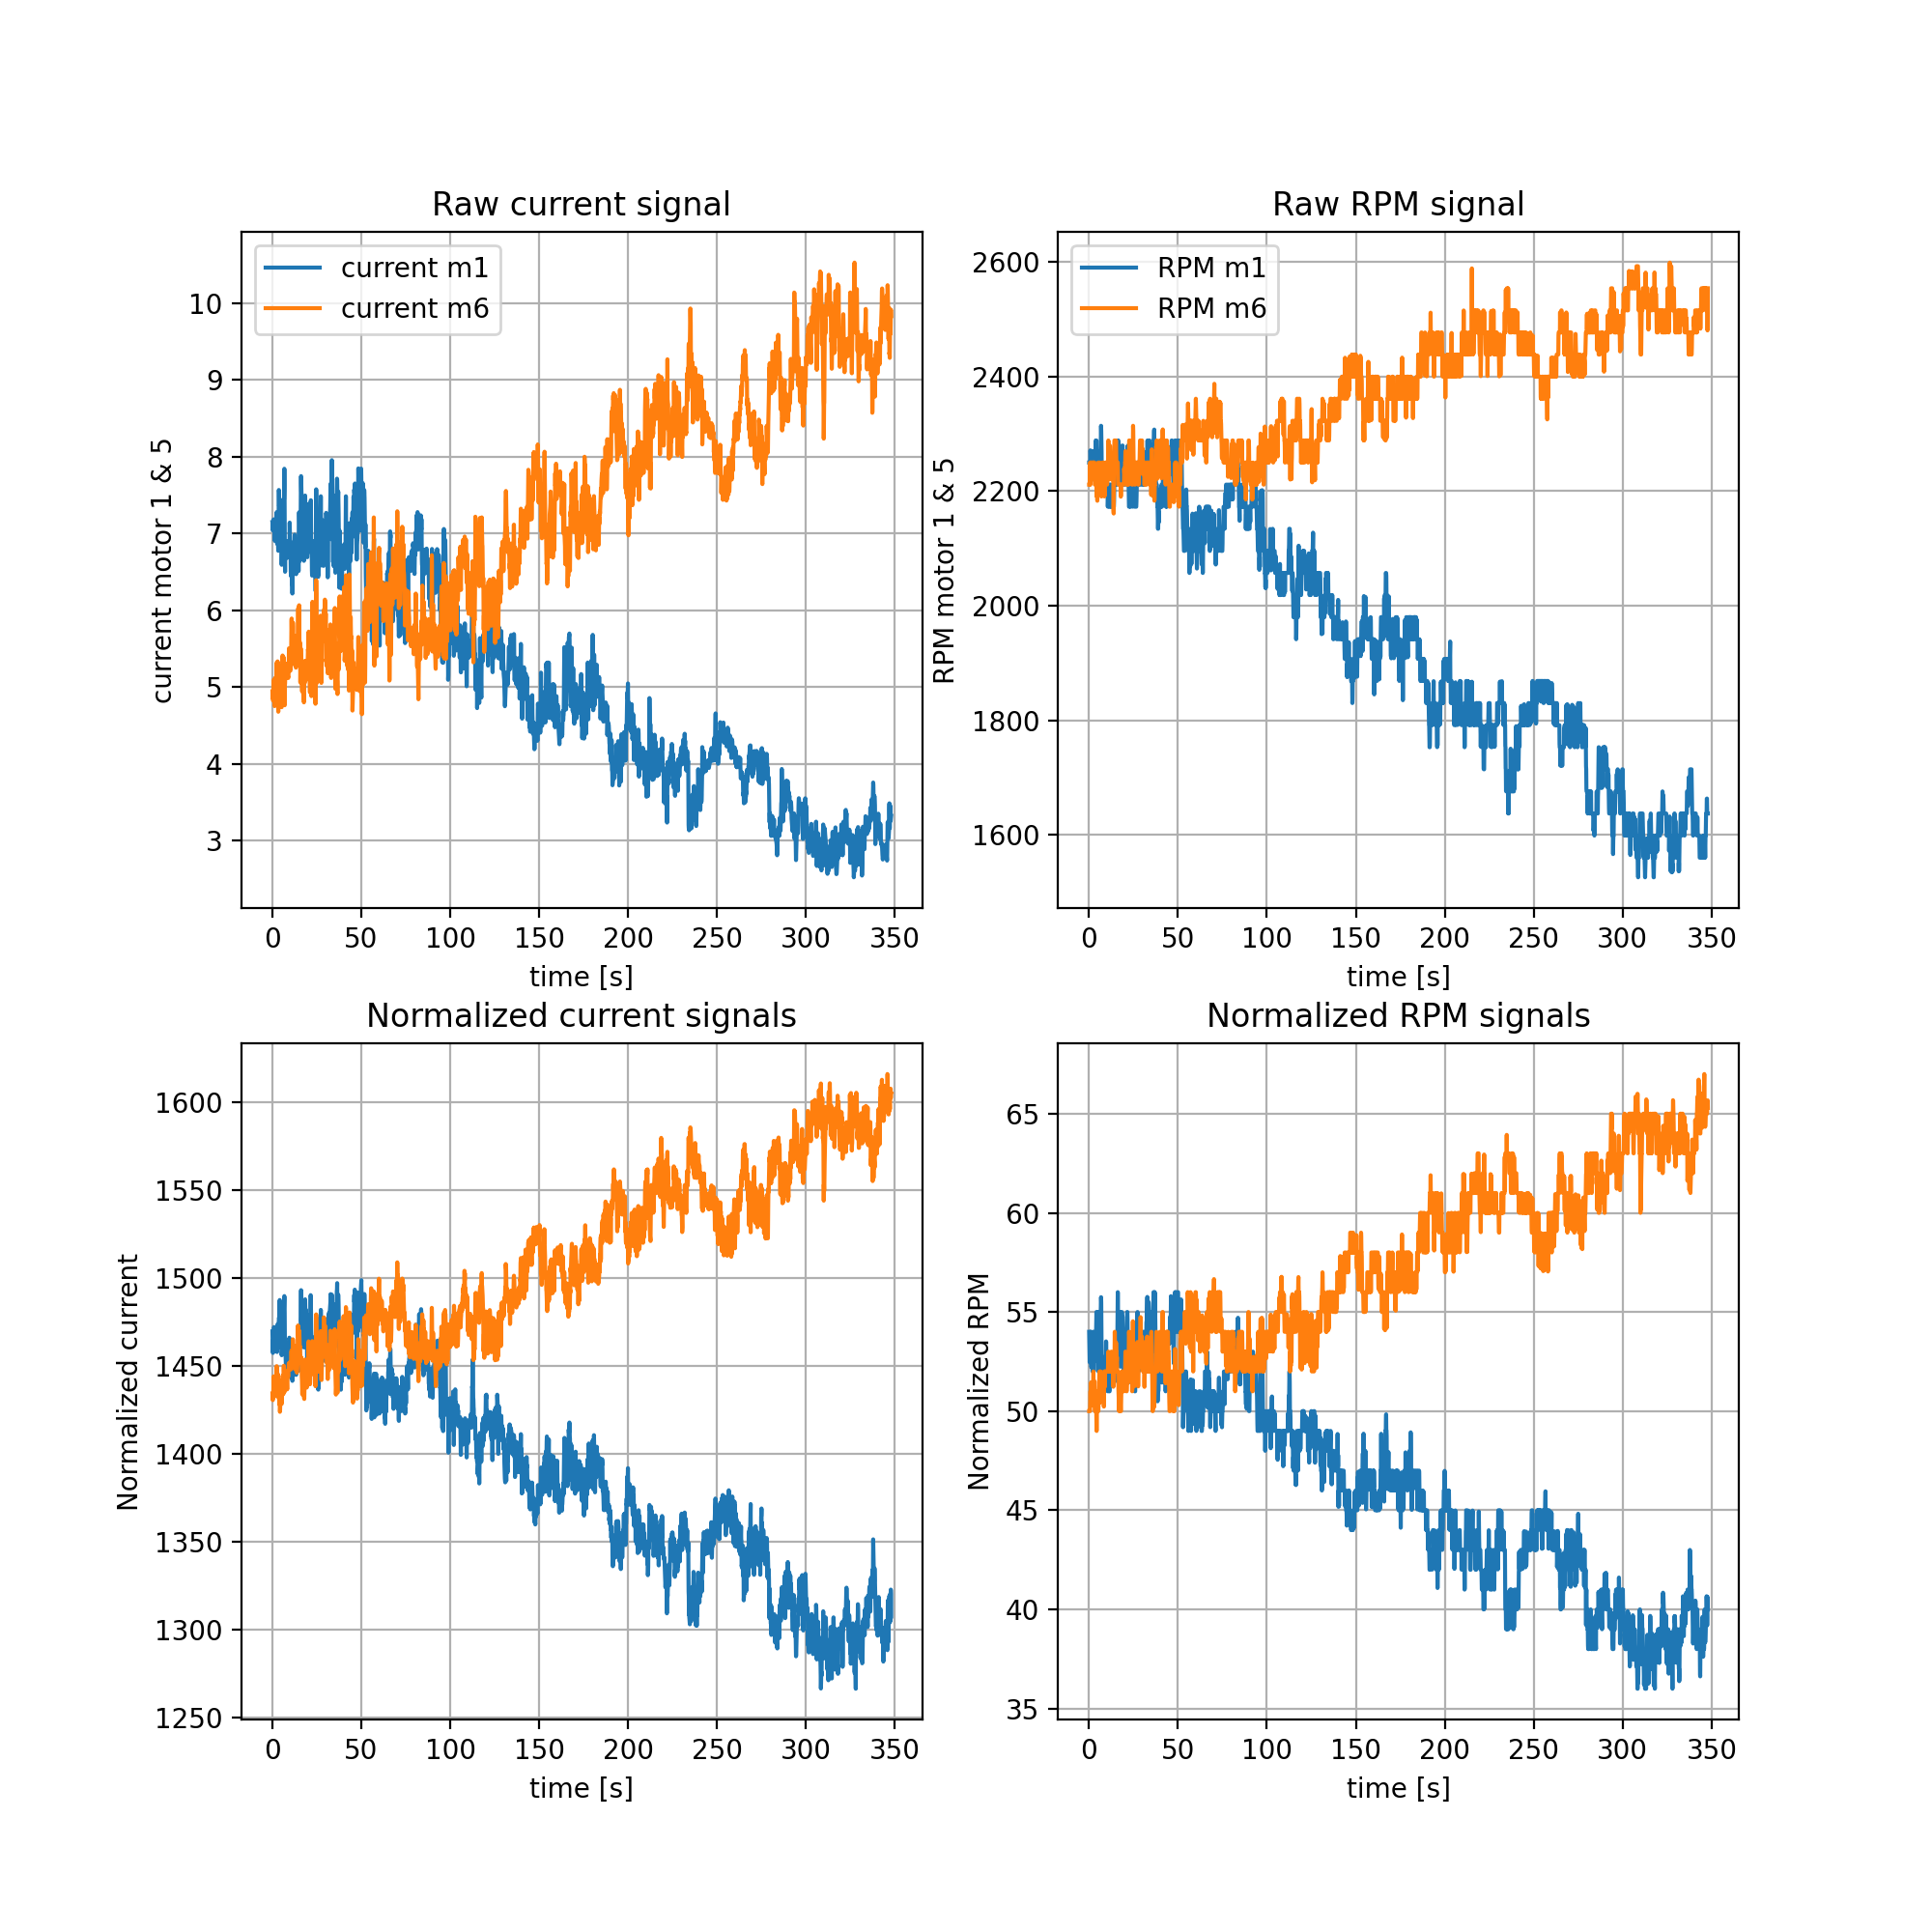

In [14]:
# setting up figure and axes

fig2, ax2 = plt.subplots(2,2, figsize=(10,10))

ax2[0][0].set_xlabel('time [s]')
ax2[0][0].set_ylabel('current motor 1 & 5')
ax2[0][0].set_title('Raw current signal')
ax2[0][0].grid()

ax2[0][1].set_xlabel('time [s]')
ax2[0][1].set_ylabel('RPM motor 1 & 5')
ax2[0][1].set_title('Raw RPM signal')
ax2[0][1].grid()

ax2[1][0].set_xlabel('time [s]')
ax2[1][0].set_ylabel('Normalized current')
ax2[1][0].set_title('Normalized current signals')
ax2[1][0].grid()

ax2[1][1].set_xlabel('time [s]')
ax2[1][1].set_ylabel('Normalized RPM')
ax2[1][1].set_title('Normalized RPM signals')
ax2[1][1].grid()

start = 0
end = time_index.size

ax2[0][0].plot(time_index[start:end], current_11[start:end], label='current m1')
ax2[0][0].plot(time_index[start:end], current_16[start:end], label='current m6')
ax2[0][0].legend()

ax2[0][1].plot(time_index[start:end], rpm_11[start:end], label='RPM m1')
ax2[0][1].plot(time_index[start:end], rpm_16[start:end], label='RPM m6')
ax2[0][1].legend()

#ax2[1].plot(time_index[start:end], in_throttle_norm[start:end], 'b', label='in_throttle')
#ax2[1].plot(time_index[start:end], out_throttle_norm[start:end], 'r', label='out_throttle')
#ax2[1].legend()

ax2[1][0].plot(time_index[start:end], in_throttle_11[start:end], label='current m1')
ax2[1][0].plot(time_index[start:end], in_throttle_16[start:end], label='current m6')

ax2[1][1].plot(time_index[start:end], out_throttle_11[start:end], label='RPM m1')
ax2[1][1].plot(time_index[start:end], out_throttle_16[start:end], label='RPM m6')

display(fig2)
#np.sum(np.abs(current_norm - rpm_norm))/current_norm.size

In [15]:
max(out_throttle_11)

56.0

In [16]:
# import filtering packages
import scipy.ndimage

<IPython.core.display.Javascript object>


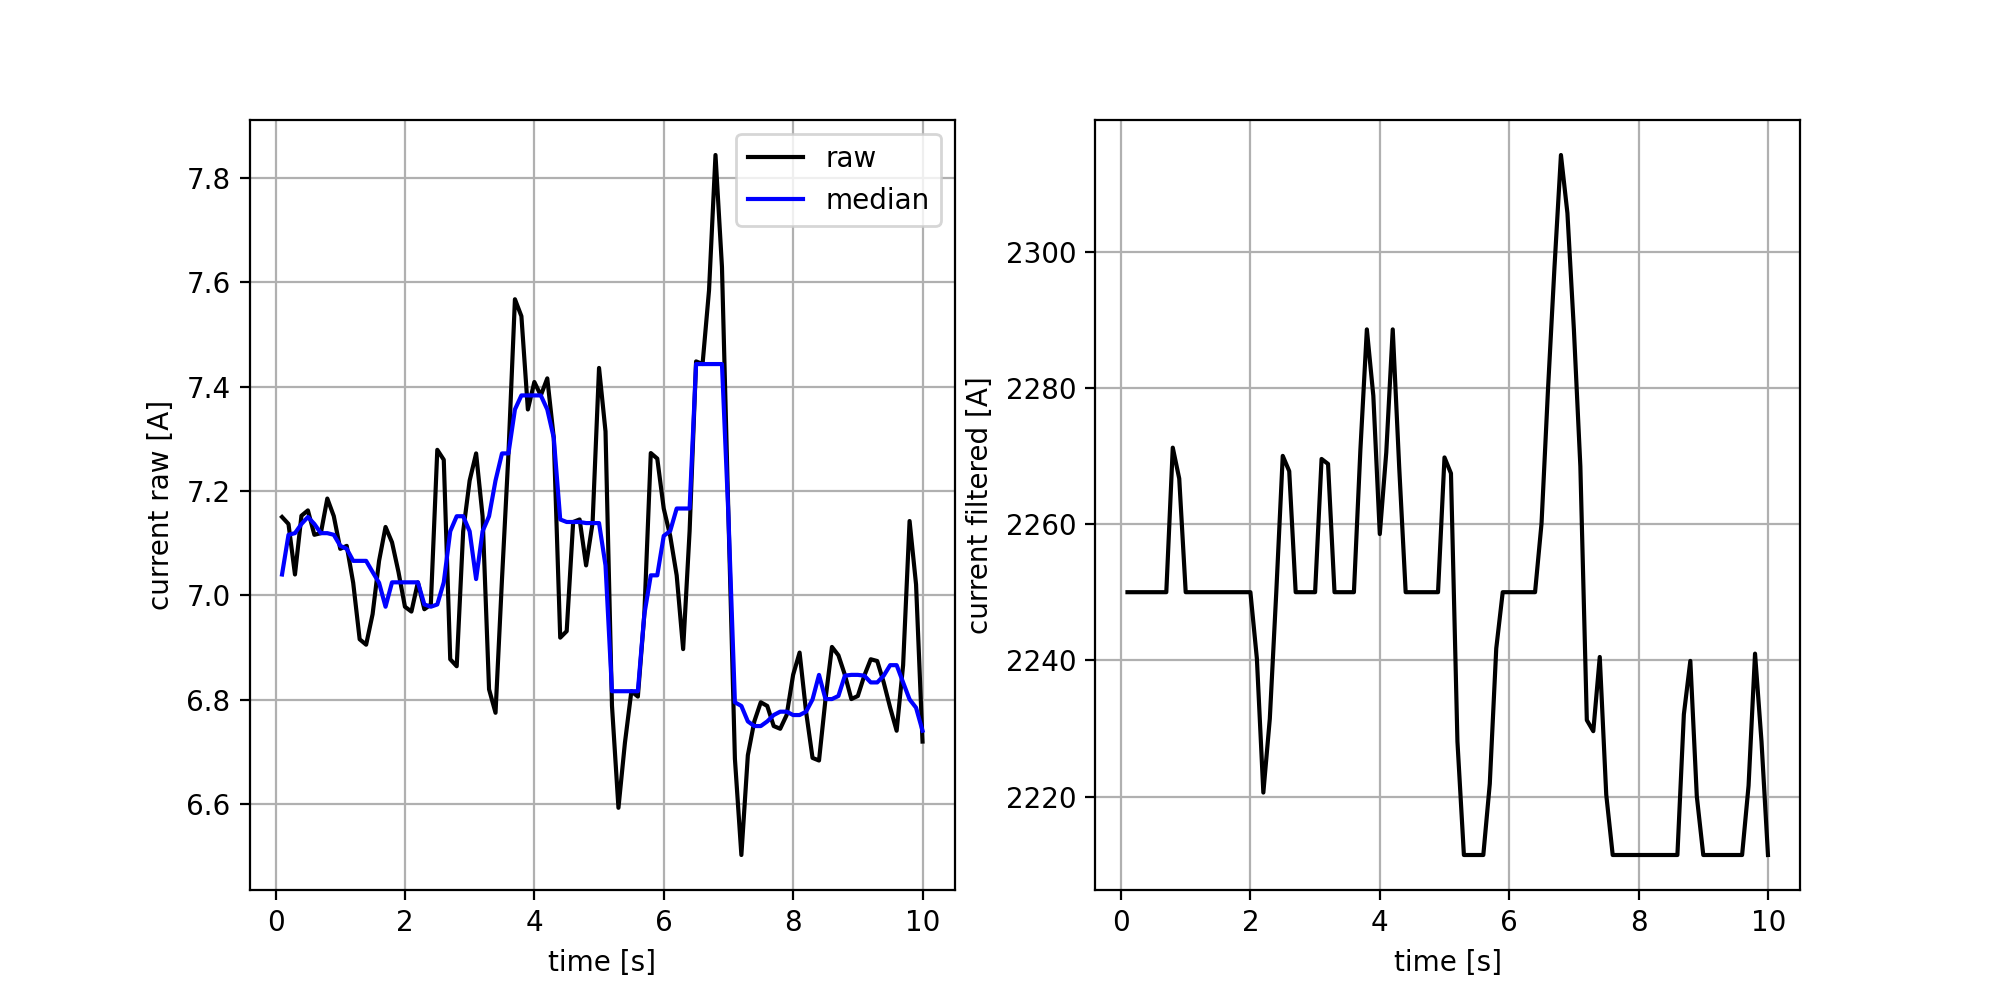

In [17]:
# Thinking about a filtering algorithm for the current signal
fig3, ax3 = plt.subplots(1,2, figsize=(10,5))
ax3[0].set_xlabel('time [s]')
ax3[0].set_ylabel('current raw [A]')
ax3[0].grid()

ax3[1].set_xlabel('time [s]')
ax3[1].set_ylabel('current filtered [A]')
ax3[1].grid()


# choose scope to show
start = 0
end = 100

# plot raw data
#ax3[0].plot(time_index[start:end], current_11[start:end])

# perform actual filtering

window_length = 9

current_11_gauss = scipy.ndimage.gaussian_filter1d(current_11, window_length)
current_11_median = signal.medfilt(current_11, window_length)
current_11_savgol = signal.savgol_filter(current_11, window_length, 2)

#rpm_11_median = signal.medfilt(rpm_11, window_length)

#ax3[0].plot(time_index[start:end], current_11_gauss[start:end], 'r')
#ax3[0].plot(time_index[start:end], current_11_median[start:end], 'g')

ax3[0].plot(time_index[start:end], (current_11[start:end]), 'k', label='raw')
ax3[0].plot(time_index[start:end], (current_11_median)[start:end], 'b', label='median')
#ax3[1].plot(time_index[start:end], normalization(current_11)[start:end], 'r')
#ax3[0].plot(time_index[start:end], (current_11_gauss)[start:end], 'r', label='gauss')
#ax3[0].plot(time_index[start:end], (current_11_savgol)[start:end], 'g', label='savgol')
ax3[0].legend()

ax3[1].plot(time_index[start:end], (rpm_11[start:end]), 'k', label='raw')
display(fig3)

<IPython.core.display.Javascript object>


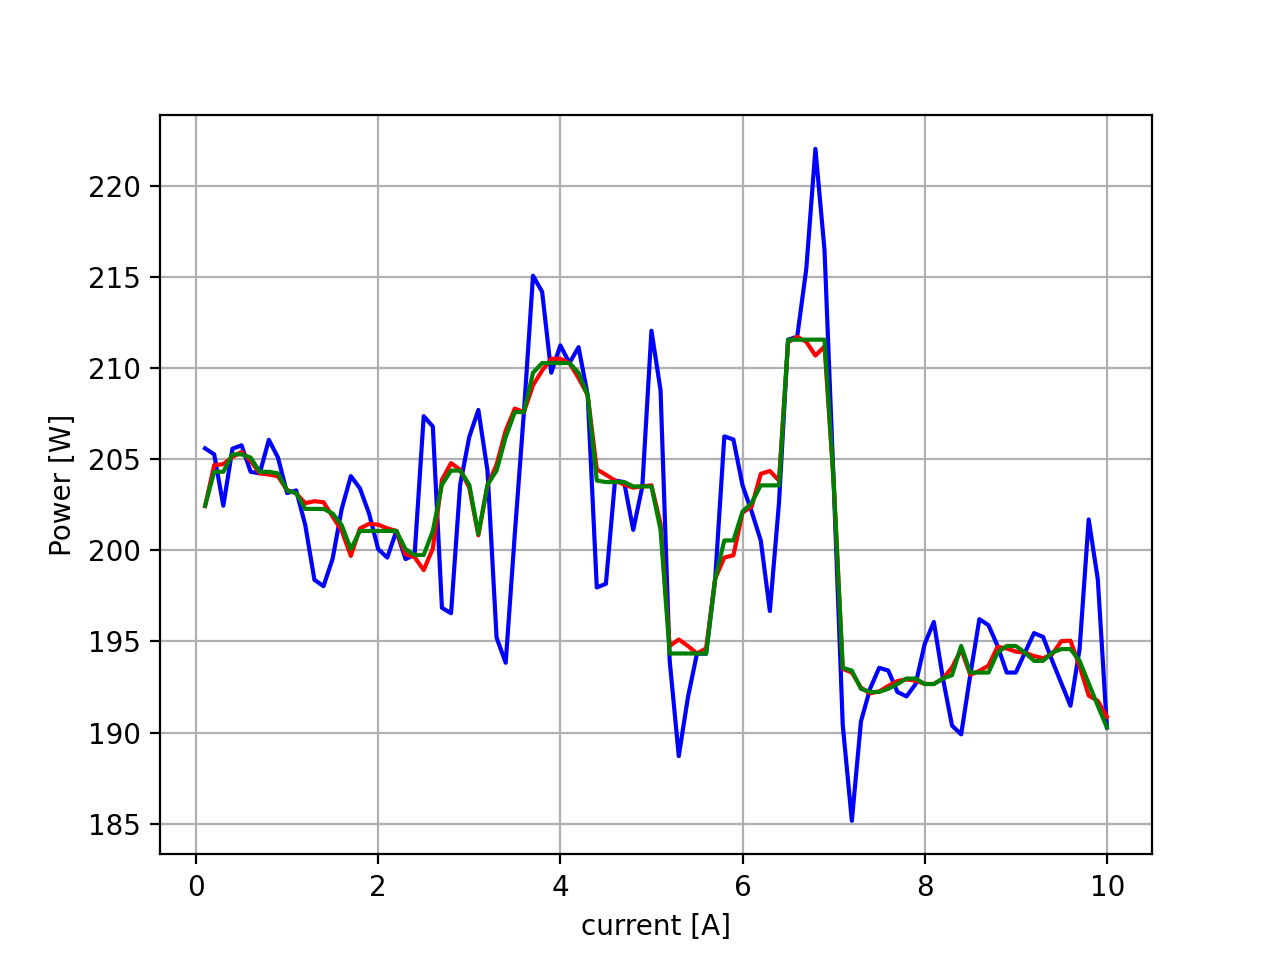

In [18]:
fig4, ax4 = plt.subplots()
ax4.set_xlabel('current [A]')
ax4.set_ylabel('Power [W]')

power_raw = voltage * current_11
power_filtered = voltage * current_11_median

ax4.plot(time_index[start:end], power_raw[start:end], 'b')
ax4.plot(time_index[start:end], power_filtered[start:end], 'r')
ax4.plot(time_index[start:end], signal.medfilt((voltage[start:end] * current_11[start:end]), window_length), 'g')

ax4.grid()
#ax4.scatter(current_11_median, rpm_11_median)
display(fig4)

<IPython.core.display.Javascript object>


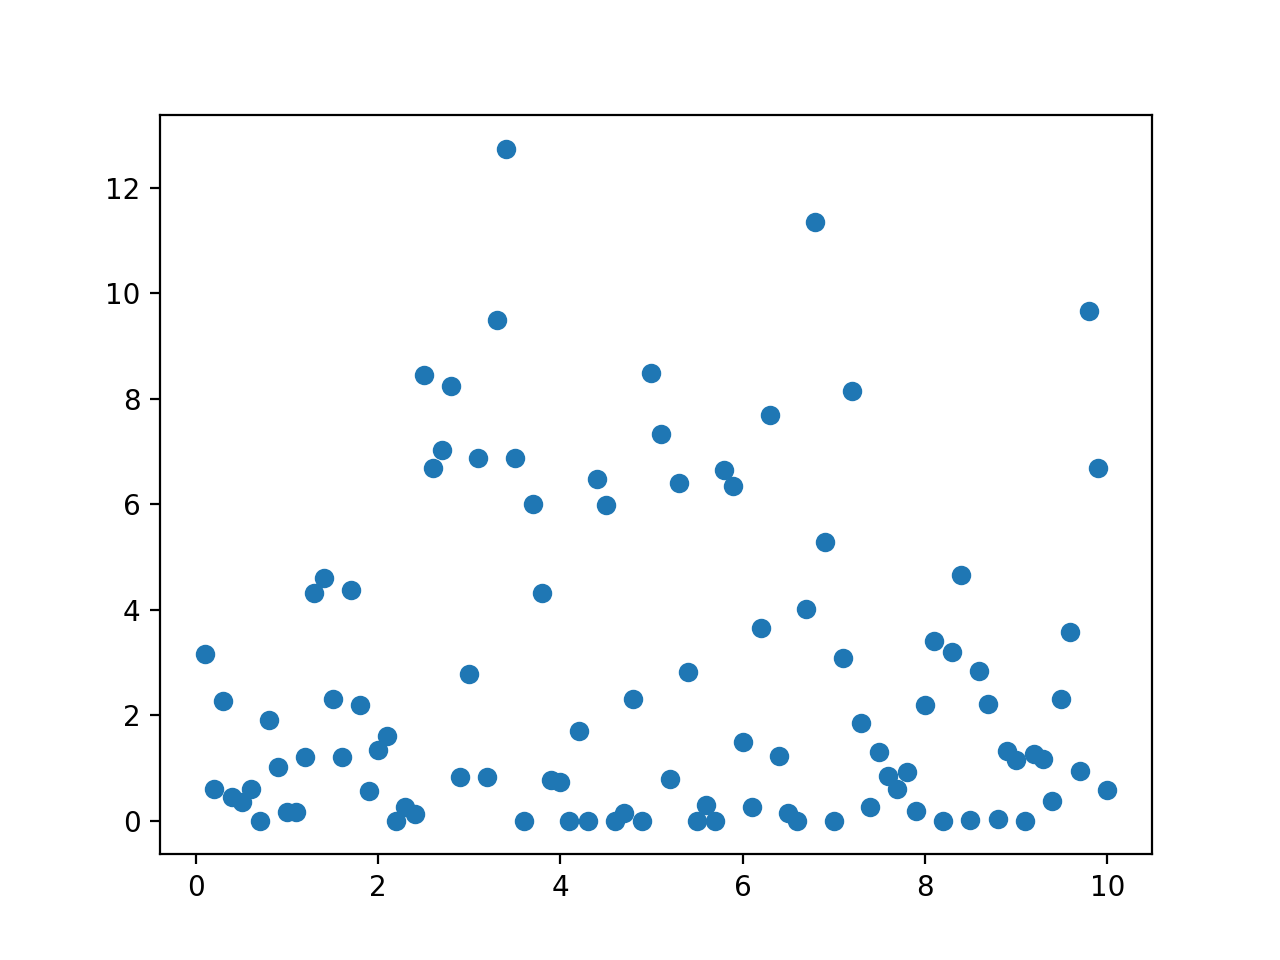

In [19]:
start = 0
end = 100

power_difference = np.abs(power_raw - power_filtered)
fig5, ax5 = plt.subplots()
ax5.scatter(time_index[start:end], power_difference[start:end])
display(fig5)

In [20]:
# accumulate power signals

# get voltage data from all motors

voltage_11 = firefly_df['esc11_voltage'].values
voltage_16 = firefly_df['esc16_voltage'].values

voltage_12 = firefly_df['esc12_voltage'].values
voltage_15 = firefly_df['esc15_voltage'].values

voltage_13 = firefly_df['esc13_voltage'].values
voltage_18 = firefly_df['esc18_voltage'].values

voltage_14 = firefly_df['esc14_voltage'].values
voltage_17 = firefly_df['esc17_voltage'].values

# get current data from all motors

current_11 = firefly_df['esc11_current'].values
current_16 = firefly_df['esc16_current'].values

current_12 = firefly_df['esc12_current'].values
current_15 = firefly_df['esc15_current'].values

current_13 = firefly_df['esc13_current'].values
current_18 = firefly_df['esc18_current'].values

current_14 = firefly_df['esc14_current'].values
current_17 = firefly_df['esc17_current'].values

# get rpm data from all motors

rpm_11 = firefly_df['esc11_rpm'].values
rpm_16 = firefly_df['esc16_rpm'].values

rpm_12 = firefly_df['esc12_rpm'].values
rpm_15 = firefly_df['esc15_rpm'].values

rpm_13 = firefly_df['esc13_rpm'].values
rpm_18 = firefly_df['esc18_rpm'].values

rpm_14 = firefly_df['esc14_rpm'].values
rpm_17 = firefly_df['esc17_rpm'].values




In [21]:
# calculate power

power_11 = voltage_11 * current_11
power_16 = voltage_16 * current_16

power_12 = voltage_12 * current_12
power_15 = voltage_15 * current_15

power_13 = voltage_13 * current_13
power_18 = voltage_18 * current_18

power_14 = voltage_14 * current_14
power_17 = voltage_17 * current_17

total_power = power_11 + power_16 + power_12 + power_15 + power_13 + power_18 + power_14 + power_17
filtered_power = signal.medfilt(total_power, 21)

<IPython.core.display.Javascript object>


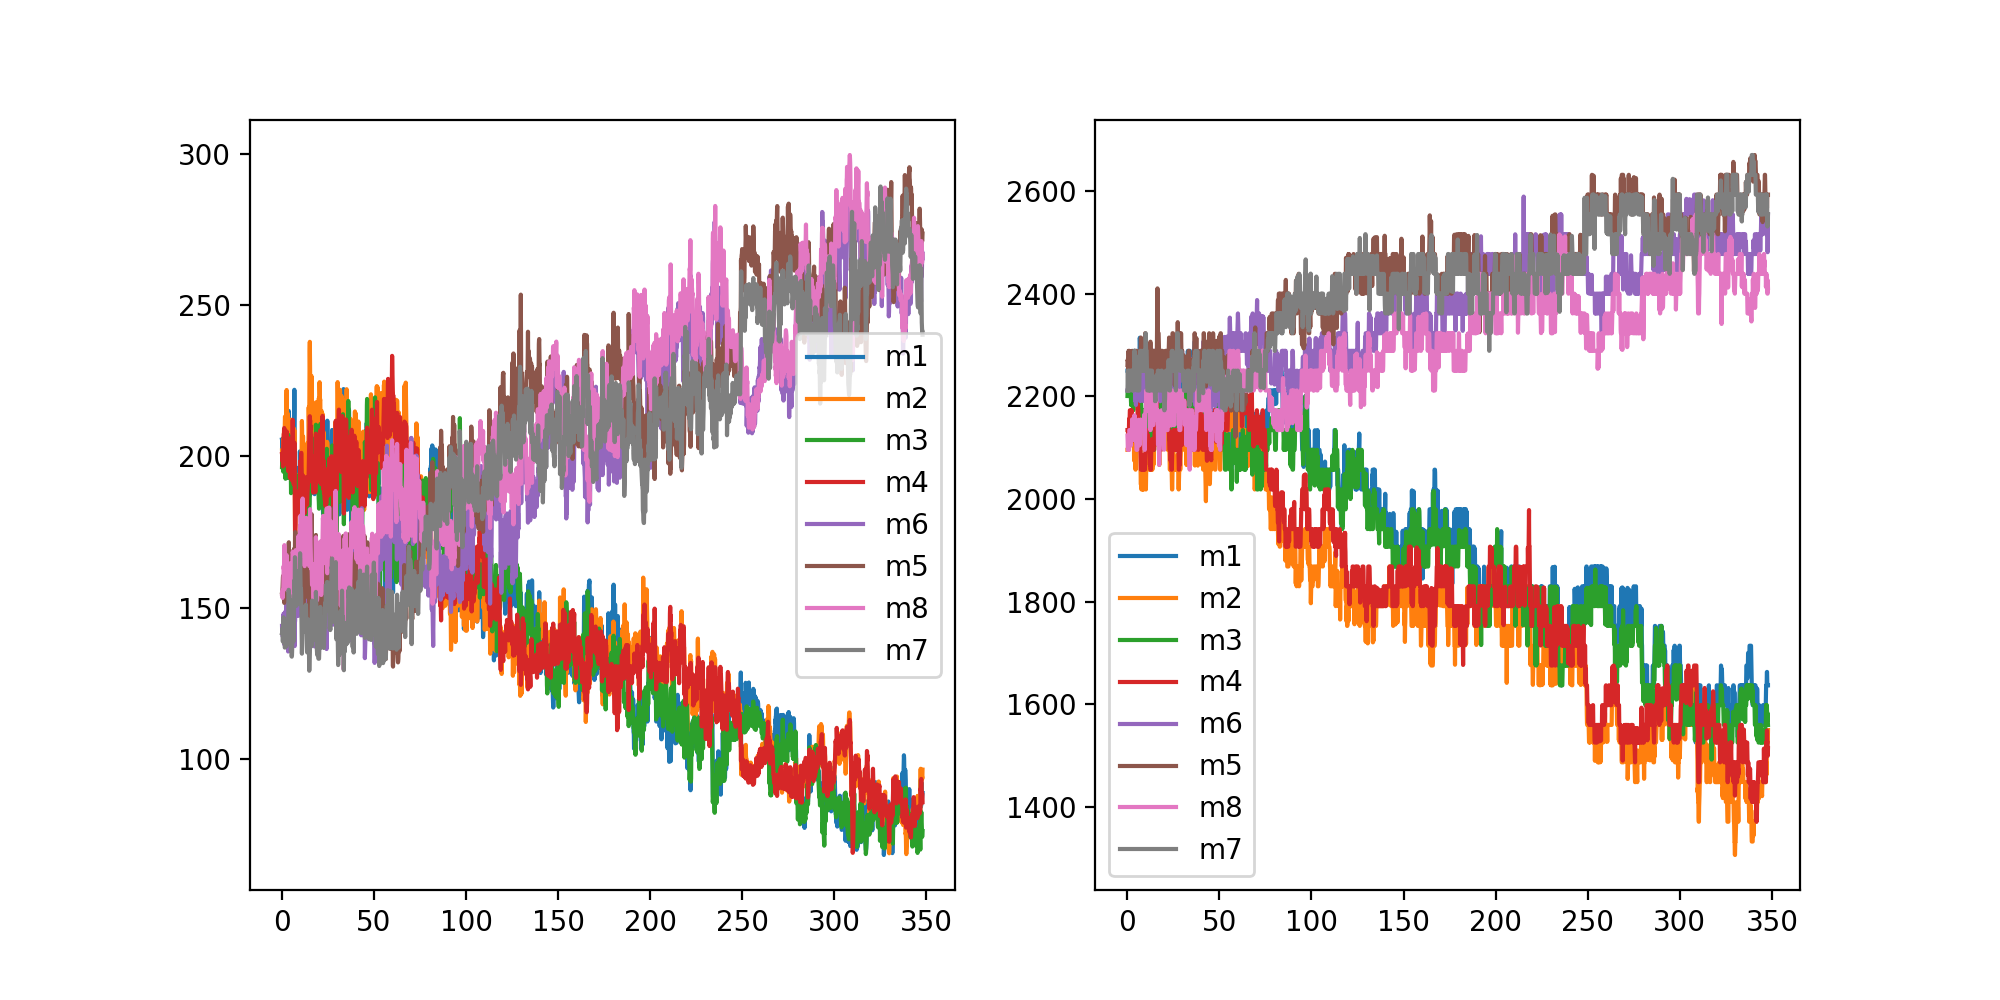

In [22]:
fig6, ax6 = plt.subplots(1,2, figsize=(10,5))

ax6[0].plot(time_index, power_11, label='m1')
ax6[0].plot(time_index, power_12, label='m2')
ax6[0].plot(time_index, power_13, label='m3')
ax6[0].plot(time_index, power_14, label='m4')

ax6[0].plot(time_index, power_16, label='m6')
ax6[0].plot(time_index, power_15, label='m5')
ax6[0].plot(time_index, power_18, label='m8')
ax6[0].plot(time_index, power_17, label='m7')
ax6[0].legend()

ax6[1].plot(time_index, rpm_11, label='m1')
ax6[1].plot(time_index, rpm_12, label='m2')
ax6[1].plot(time_index, rpm_13, label='m3')
ax6[1].plot(time_index, rpm_14, label='m4')

ax6[1].plot(time_index, rpm_16, label='m6')
ax6[1].plot(time_index, rpm_15, label='m5')
ax6[1].plot(time_index, rpm_18, label='m8')
ax6[1].plot(time_index, rpm_17, label='m7')
ax6[1].legend()

#ax6[1].plot(time_index, rpm_11)

display(fig6)

<IPython.core.display.Javascript object>


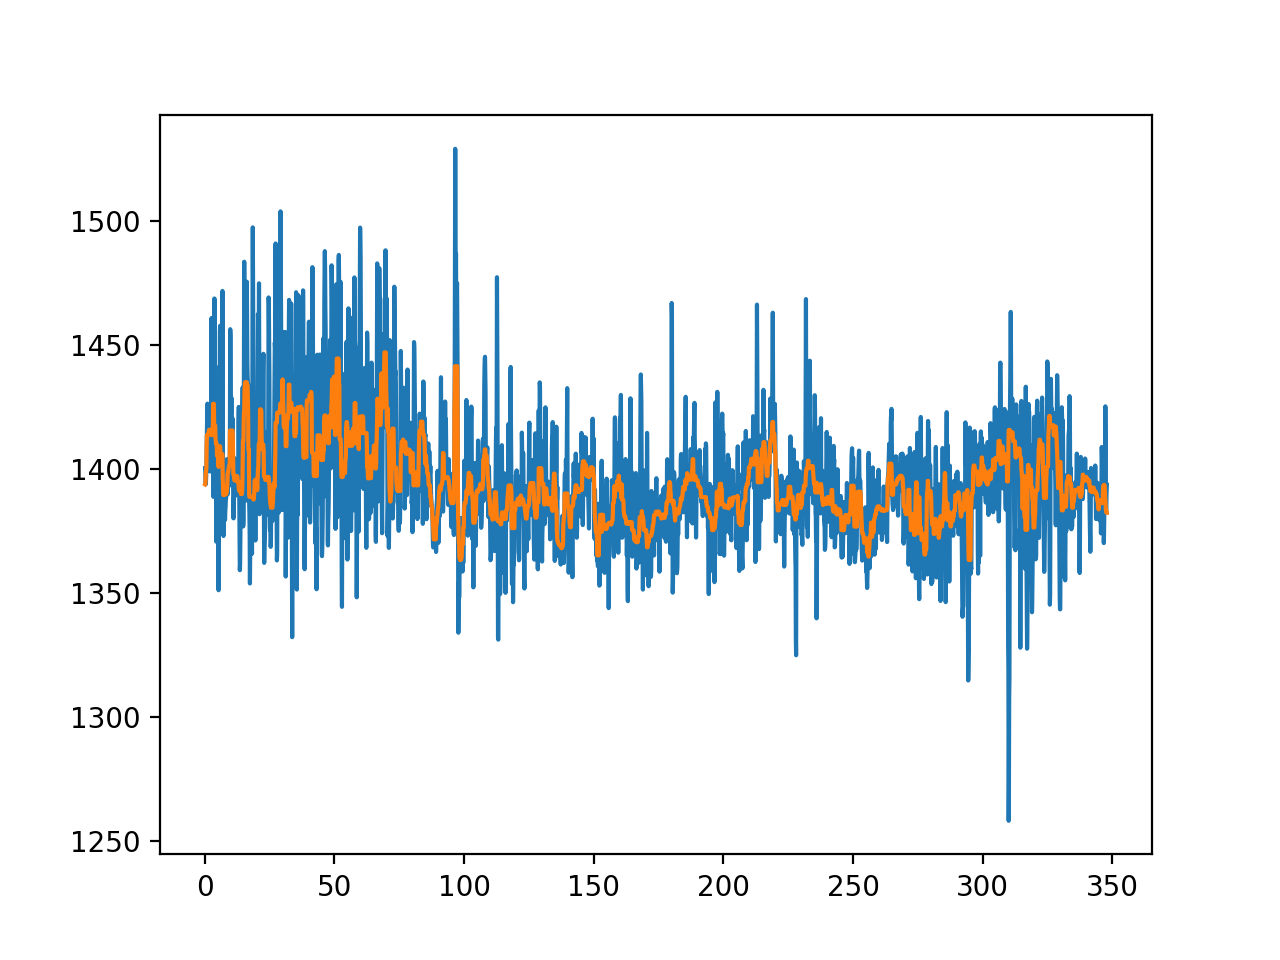

In [23]:
fig7, ax7 = plt.subplots()

ax7.plot(time_index, total_power)
ax7.plot(time_index, filtered_power)
display(fig7)

# Filtering of static points

In [24]:
# get positions, velocities and angular rates

import matplotlib.cm as cm

x = ulg_df['ulg_pv_df']['x'].values
y = ulg_df['ulg_pv_df']['y'].values
z = ulg_df['ulg_pv_df']['z'].values

u = ulg_df['ulg_pv_df']['vx'].values
v = ulg_df['ulg_pv_df']['vy'].values
w = ulg_df['ulg_pv_df']['vz'].values

p = ulg_df['ulg_angvel_df']['roll rate'].values
q = ulg_df['ulg_angvel_df']['pitch rate'].values
r = ulg_df['ulg_angvel_df']['yaw rate'].values

In [ ]:
# 

In [ ]:
# global plotting settings
markersize = 4

In [25]:
ulg_df.keys()
psi = ulg_df['ulg_att_df']['yaw'].values

In [1]:
figx, axx = plt.subplots(1, 3, figsize=(12,4))

t0 = 0
t1 = time_index.size

axx[0].scatter(y[t0:t1],x[t0:t1], c=time_index[t0:t1], cmap=cm.cool, label='N-E', s=markersize)
axx[0].grid()
axx[0].set_xlabel('East')
axx[0].set_ylabel('North')
axx[0].legend()

axx[1].scatter(time_index[t0:t1], u[t0:t1], c=time_index[t0:t1], cmap=cm.cool, label='u', s=markersize)
axx[1].scatter(time_index[t0:t1], y[t0:t1], c=time_index[t0:t1], cmap=cm.cool, label='y', s=markersize)
axx[1].grid()
axx[1].legend()

axx[2].scatter(time_index[t0:t1], v[t0:t1], c=time_index[t0:t1], cmap=cm.cool, label='v', s=markersize)
axx[2].grid()
axx[2].legend()

print(x[0])
print(y[0])
display(figx)

NameError: name 'plt' is not defined

In [2]:
# try to integrate velocity to get an idea about error
from scipy import integrate 
pos_int = integrate.cumtrapz(u, x=(time_index-time_index[0]).reshape(-1), initial=y[0])

fig10, ax10 = plt.subplots(figsize=(10,5))

ax10.scatter(time_index[t0:t1], -(u[t0:t1]-np.mean(u)), c='r', label='u', s=markersize)
ax10.scatter(time_index[t0:t1], y[t0:t1], c='k', label='y (North)', s=markersize)
#ax10.plot(time_index[t0:t1], pos_int[t0:t1], c='b', label='interp')


window = 5
y_mov = np.convolve(-(u-np.mean(u)), np.ones(window), 'same') / window
#y_mov_f = np.convolve(u, np.ones(window), 'same') / window
dt = time_index[1] - time_index[0]
dy = np.gradient(y, dt[0])
print(np.mean(-u))
ax10.plot(time_index[t0:t1], y_mov[t0:t1], label='u (mov)')
#ax10.plot(time_index[t0:t1], y_mov_f[t0:t1], label='fi')
ax10.plot(time_index[t0:t1], dy[t0:t1], label='gradient')

ax10.grid()
ax10.legend()

display(fig10)

ModuleNotFoundError: No module named 'scipy'

In [115]:
# Calculate mean and standard deviation of velocities
u_mean = np.mean(u); print('mu_u = ' + str(u_mean))
u_std = np.std(u); print('sig_u = ' + str(u_std))

v_mean = np.mean(v); print('\nmu_v = ' + str(v_mean))
v_std = np.std(v); print('sig_v = ' + str(v_std))

w_mean = np.mean(w); print('\nmu_w = ' + str(w_mean))
w_std = np.std(w); print('sig_w = ' + str(w_std))

mu_u = 0.07555801598637385
sig_u = 0.08838937319089747

mu_v = 0.11612436258016309
sig_v = 0.07311082880205362

mu_w = -0.008357330118290691
sig_w = 0.04121548083255749


In [28]:
fig8, ax8 = plt.subplots(2,2, figsize=(10,10))

ax8[0][0].scatter(time_index, (u), label='u', s=markersize, c='k')
ax8[0][1].scatter(time_index, (v), label='v', s=markersize, c='b')
ax8[1][0].scatter(time_index, (w), label='w', s=markersize, c='r')
ax8[1][1].scatter(time_index, total_power, label='P', s=markersize, c='g')
for axh in ax8:
    for axv in axh:
        axv.grid()
        axv.legend()

display(fig8)

NameError: name 'markersize' is not defined

In [29]:
# set thresholds to filter out certain values

uv_threshold = 0.05 # m/s
w_threshold = 0.05  # m/S
pq_threshold = 5  # deg/s
r_threshold = 5    # deg/s

In [30]:
# gel all data points where velocity ist lower than 3cm / second

u_static = np.where(abs(u) < uv_threshold)[0]
v_static = np.where(abs(v) < uv_threshold)[0]
w_static = np.where(abs(w) < w_threshold)[0]

# filter 
p_static = np.where(abs(p) < pq_threshold)
q_static = np.where(abs(q) < pq_threshold)
r_static = np.where(abs(r) < r_threshold)
#r_static = np.where(abs(r))

In [31]:
# get 
translational_indices = np.intersect1d(u_static, np.intersect1d(v_static, w_static))
angular_indices       = np.intersect1d(p_static, np.intersect1d(q_static, r_static))
norm = np.sqrt(u[translational_indices]**2 + v[translational_indices]**2 + w[translational_indices]**2)

In [32]:
#translational_indices
#angular_indices

In [33]:
pois = np.intersect1d(translational_indices, angular_indices)
print(pois)

[  71   73   74 1856 1857 1858 1859 1860 1880 1881 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033
 2034 2035 2036 2037 2720 2721 2722 2723 2724 2725 2726 2727 2728 2750
 2751 2752 2753 2754 2755 2756 2757 2758 2759 2760 2761 2762 2763 2764
 2765 2766 2767 2768 2769 2770 2771 2772 2773 2774 2775 2776 2777 2778
 2779 2780 2781 2782 2801 2802 2803 2804 2805 2806 2807 2808 2809 2831
 2832 2833 2834 2835 2836 2837 2838 2839 2840 2841 2842 2843 2844 2845
 2846 2847 2848 2849 2850 2851 2852 2853 2854 2855 2856 2857 2858 2859
 2916 2924 2925 2926 2927 2928 2929 2930 2931 2932 2933 2934 2935 2936
 2946 2947 2948 2949 2950 2951 2952 2953 2954 3117 3118 3119 3120 3121
 3122 3123 3124 3125 3126 3127 3128 3129 3130 3131 3132 3133 3153 3154
 3155 3205 3206 3207 3208 3209 3210 3238 3239 3240 3241 3279 3280 3281
 3282 3299 3300 3301 3302 3303 3304 3305 3334 3335 3336 3337 3338 3339
 3354 3355 3356 3357 3358 3359 3360 3361 3362 3363 3364 3365 3366 3367
 3368 

<IPython.core.display.Javascript object>


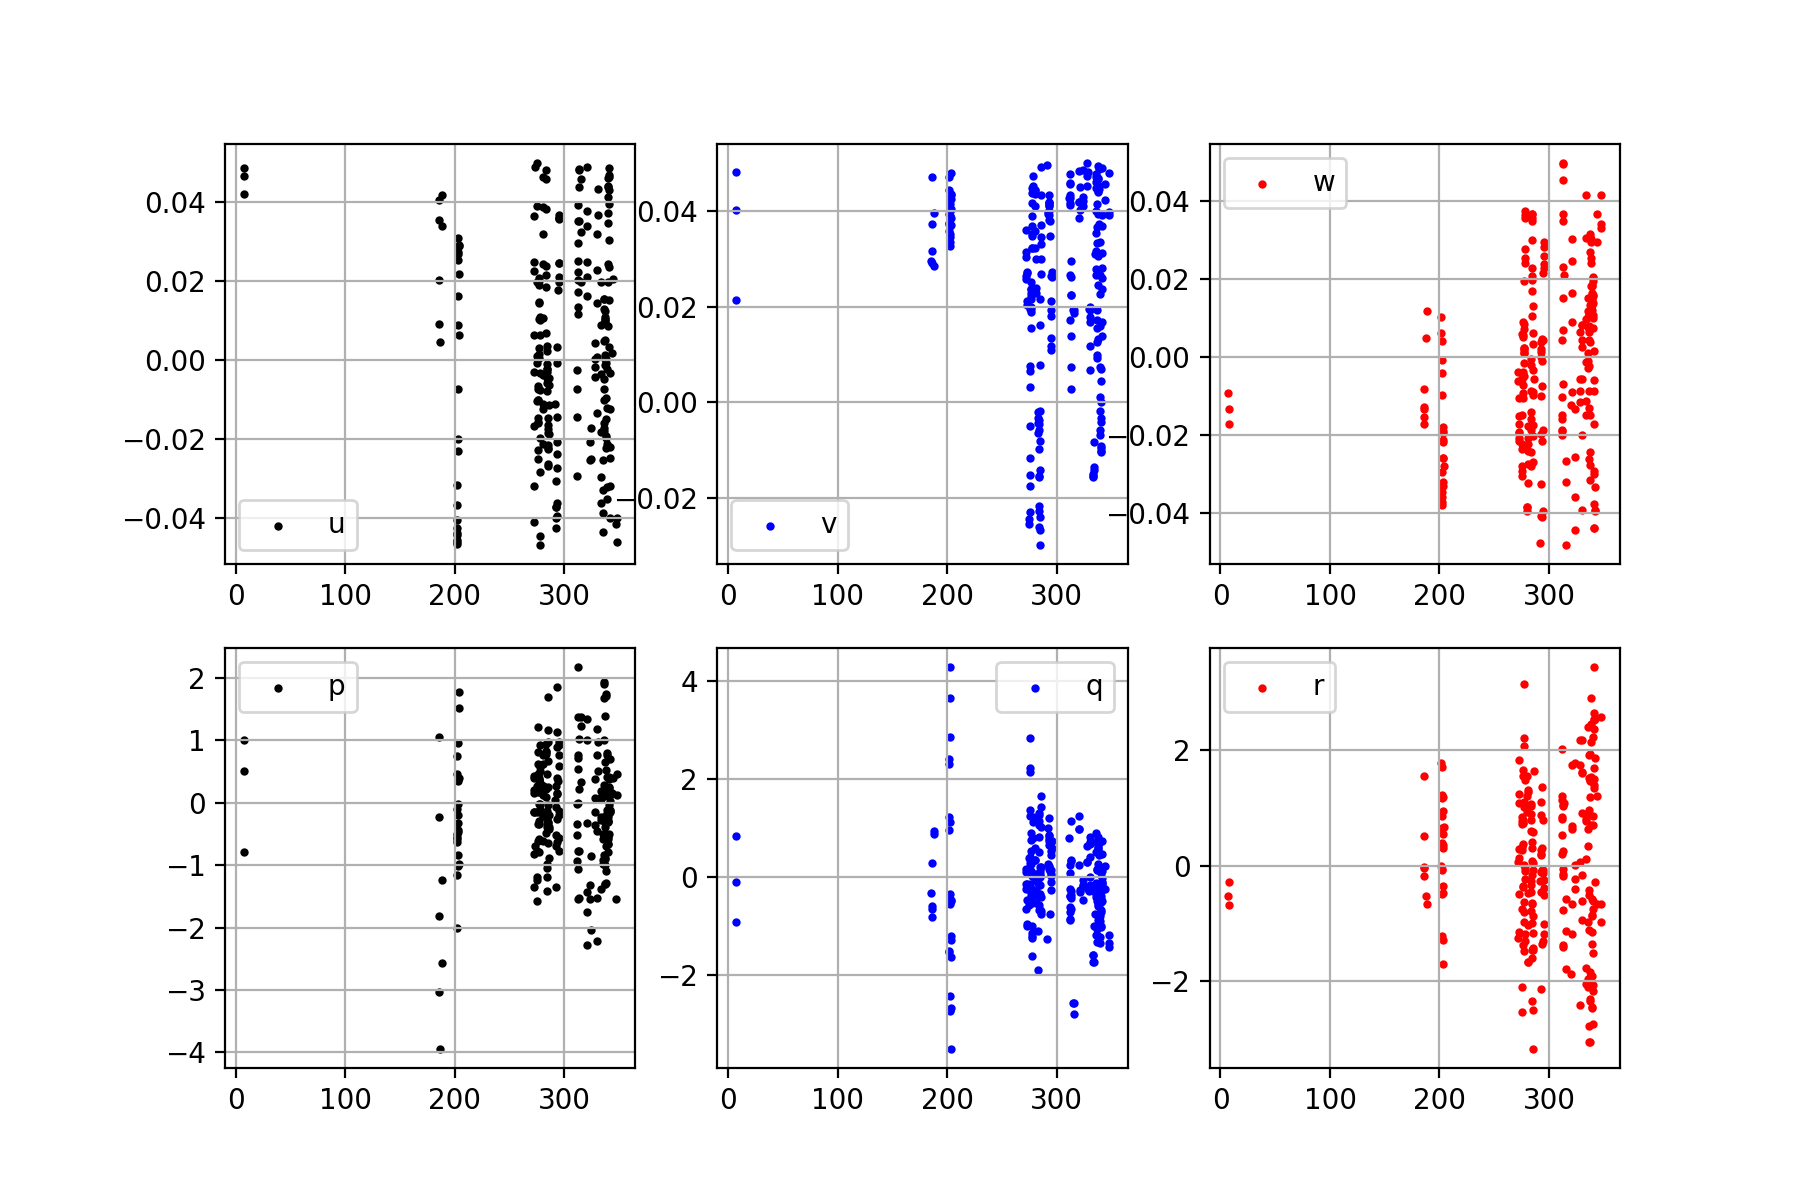

In [34]:
fig7, ax7 = plt.subplots(2,3, figsize=(9,6))

start = 1110
end = 1140

time = time_index[pois]
ax7[0][0].scatter(time, u[pois], label='u', s=markersize, c='k')
ax7[0][1].scatter(time, v[pois], label='v', s=markersize, c='b')
ax7[0][2].scatter(time, w[pois], label='w', s=markersize, c='r')

ax7[1][0].scatter(time, p[pois], label='p', s=markersize, c='k')
ax7[1][1].scatter(time, q[pois], label='q', s=markersize, c='b')
ax7[1][2].scatter(time, r[pois], label='r', s=markersize, c='r')

for i in range(0,2):
    for j in range(0,3):
        ax7[i][j].grid()
        ax7[i][j].legend()
# plot power
#ax7[0].scatter(time_index[pois], total_power[pois], label='Power')
#ax7[].legend()
#ax7[2].grid()

display(fig7)

In [188]:
# Analysis of correlation

print("Correlation between u and P: {}".format(np.corrcoef(u, total_power)[0][1]))
print("Correlation between v and P: {}".format(np.corrcoef(v, total_power)[0][1]))
print("Correlation between w and P: {}".format(np.corrcoef(w, total_power)[0][1]))
print()
print("Correlation between p and P: {}".format(np.corrcoef(p, total_power)[0][1]))
print("Correlation between q and P: {}".format(np.corrcoef(q, total_power)[0][1]))
print("Correlation between r and P: {}".format(np.corrcoef(r, total_power)[0][1]))

Correlation between u and P: 0.16465763905029185
Correlation between v and P: 0.08473107721975336
Correlation between w and P: 0.3220108141067611

Correlation between p and P: 0.037757786944826705
Correlation between q and P: 0.032894934503052274
Correlation between r and P: 0.004347232541122424


In [166]:
ulg_df['ulg_att_df']

,roll,pitch,yaw,angle norm
0.099974,0.834768,0.253348,161.238859,161.241220
0.199948,0.971267,0.246363,161.214148,161.217263
0.299922,1.046997,0.283122,161.202298,161.205948
0.399897,1.139534,0.333337,161.187556,161.191929
0.499871,1.178476,0.340744,161.161272,161.165941
...,...,...,...,...
347.510136,0.803201,0.105021,162.580189,162.582212
347.610110,0.678136,-0.031360,162.619081,162.620499
347.710084,0.633897,-0.140729,162.635936,162.637234
347.810058,0.618157,-0.248965,162.682327,162.683692
